## Machine Learning for the Geological Sciences
### Pandas DataFrame Tutorial
##### By: Jackson R. Tomski – Geophysicist/Machine Learning Specialist
#### What should you take from this workflow?
* Become familiar with how to implement and use Pandas DataFrames as a means to create code, read in data, create new dataset by performing data cleaning, visualizing data, and converting specific columns (or the whole dataset) of a pandas DataFrame to a NumPy array

Let's start demonstrating how to use this library by loading in three different datasets that have type strings, floats, and ints, and let's edit it. We will do this in order to create a dataset to later visualize some features, and to further demonstrate the use and applications of the Pandas DataFrame Python Library. So with that, let's first load in the libraries used throughout this workflow, and load in three different kinds of production data with different information regarding the Bakken Reservoir

In [1]:
###################################################################################################################
import numpy as np                                              # ndarrys for gridded data
import pandas as pd                                             # DataFrames for tabular data
import os                                                       # Set working directory, run executables
import shutil                                                   # To help direct folder to output figures
from functools import reduce                                    # Used to find the intersecting values in all various datasets
import time                                                     # Track computational time
import warnings                                                 # Allows the code to ignore uneccessary warnings
import seaborn as sns                                           # For matrix scatter plots
import matplotlib.pyplot as plt                                 # For plotting
from pandas.plotting import scatter_matrix
warnings.filterwarnings('ignore')
###################################################################################################################

#### Set the working directory and load the datasets into a Pandas DataFrame

We will read in three different excel files using the Pandas DataFrame Library. We imported the library as pd, and we will then call 'read_excel' afterwards to get the desired file

In [2]:
###################################################################################################################
os.chdir("/Users/jacksontomski/Desktop/Desktop_Folders/GEO391/GEO391_2020/GEO391_SummerWork/Updated_GEO391_Labs_Workflows_Datasets_HWs/Datasets/")
###################################################################################################################
df_well_index = pd.read_excel("well-index.xlsx")                       # Read a .xlsx file in as a DataFrame
df_cum_oil_365 = pd.read_excel("APIS_cum_oil_365.xlsx")                # Read a .xlsx file in as a DataFrame
df_completion = pd.read_excel("completion.xlsx")                       # Read a .xlsx file in as a DataFrame
###################################################################################################################

#### The series of DataFrame output code down below is done to help myself figure out how to create a structured dataset of all 3 datasets with the correct length, and no repetitive well log APIs

In order to view the first 5 reads of any Pandas DataFrame, we will use '.head()' in order to do so. We would use '.tail()' in order to view the last 5 rows, and use '.tail(10)' to view the last 10 rows... Same method would apply to view the first 10 rows of the DataFrame

In [3]:
###################################################################################################################
df_well_index.head()
###################################################################################################################

,API,file_no,Current_Operator,Current_Well_Name,Lease_Name,Lease_Number,Original_Operator,Original_Well_Name,Spud_Date,TD,...,Footages,Field_Name,Produced_Pools,Wellbore,Latitude,Longitude,Well_Type,Well_Status,CTB,Well_Status_Date
0,33011013190000,16064,"CONTINENTAL RESOURCES, INC.",MPHU 44-9,MPHU,44-9,"CONTINENTAL RESOURCES, INC.",MPHU 44-9,2010-05-06,NaN,...,426 FSL 315 FEL,MEDICINE POLE HILLS,RED RIVER,HORIZONTAL RE-ENTRY,46.091078,-103.681843,OG,A,404538.0,2010-08-07 00:00:00
1,33025005960000,16327,MARATHON OIL COMPANY,BENZ 14-21H,BENZ,14-21H,"PROSPECTIVE INVESTMENT & TRADING CO., LTD.",BENZ 1-21H,2010-06-26,20210.0,...,660 FSL 400 FWL,BAILEY,BAKKEN,HORIZONTAL,47.446328,-102.671590,OG,A,116327.0,2010-09-19 00:00:00
2,33007015830000,16431,WHITING OIL AND GAS CORPORATION,BSMU 1305,BSMU,1305,WHITING OIL AND GAS CORPORATION,BSMU 1305,2010-04-10,9510.0,...,906 FSL 1197 FEL,BIG STICK,MADISON,DIRECTIONAL,47.112737,-103.418030,OG,A,406270.0,2010-05-26 00:00:00
3,33007015840000,16435,WHITING OIL AND GAS CORPORATION,BSMU 3204,BSMU,3204,WHITING OIL AND GAS CORPORATION,BSMU 3203,2012-01-28,9505.0,...,1131 FNL 1776 FWL,BIG STICK,MADISON,DIRECTIONAL,47.078109,-103.384544,OG,A,406270.0,2012-04-04 00:00:00
4,33061005310000,16587,"EOG RESOURCES, INC.",ROSS 20-16H,ROSS,20-16H,"EOG RESOURCES, INC.",EDITH 1-16H,2010-05-03,14770.0,...,300 FNL 1200 FWL,ALGER,BAKKEN,HORIZONTAL,48.340815,-102.520857,OG,A,116587.0,2010-07-28 00:00:00


In [4]:
###################################################################################################################
df_cum_oil_365.head()
###################################################################################################################

,API,cum_oil_365
0,33053032160000,262305.0
1,33053036170000,151827.0
2,33053050680000,NaN
3,33025024960000,NaN
4,33053051180000,NaN


In [5]:
###################################################################################################################
df_completion.head()
###################################################################################################################

,API,bottom,file_number,fluid_bbl,fluid_bbl_per_ft,fluid_gal,fluid_gal_per_ft,ft_per_stage,lateral_length,max_treat_press,max_treat_rate,propp_lbs,propp_lbs_per_ft,stages,top,treatment_date
0,33061029770000,20171,27710,63941,6,2685522,273,280,9806,8239,46.3,3222497,328,35,10365,2015-03-14
1,33053065160000,20490,30120,55859,6,2346078,260,300,9020,8820,41.4,3360688,372,30,11470,2015-02-27
2,33061032390000,15774,29063,46076,9,1935192,379,221,5102,8982,89.6,1676744,328,23,10672,2015-02-16
3,33025026550000,20688,29220,67183,7,2821686,307,262,9190,8327,44.1,4035990,439,35,11498,2015-02-15
4,33053064110000,21157,29814,59245,2,2488290,124,666,20007,9171,40.6,3522422,176,30,1150,2015-02-15


This block of code finds like API values in all three datasets. An API is a unique number of a given well, so when we derive our final dataset, we want to make sure we have 1 row for each well versus having multiple rows for a given well. The real we can have multiple rows for a given well is if a company completed the well more than once over a period of time

In [6]:
###################################################################################################################
api_intersection = reduce(np.intersect1d, (df_completion['API'], df_cum_oil_365['API'], df_well_index['API']))
print(len(api_intersection))
df_api_intersection = pd.DataFrame(api_intersection, columns=['APIs in all 3 datasets'])
###################################################################################################################
df_api_intersection.head()
###################################################################################################################

8349


,APIs in all 3 datasets
0,33007015830000
1,33007016320000
2,33007016380000
3,33007016390000
4,33007016410000


#### Delete rows with null values, delete rows with zero values for features max_treat_rate and max_treat_press in completion dataset, and delete rows that are not Bakken producing wells

Here we want to delete any rows in the df_well_index DataFrame that do not have any values (i.e., null/nan values), and we also want to drop rows that don't correspond to Bakken only producing wells

In [7]:
###################################################################################################################
print(len(df_well_index))   # Length of dataset before dropping rows with nan values
df_well_index = df_well_index.dropna(how='any', axis=0)
# Here we want to drop any row that does have 'BAKKEN' listed within the 'Produced_Pools' feature/variable/column
df_well_index = df_well_index.drop(df_well_index[(df_well_index['Produced_Pools'] != 'BAKKEN')].index)
print(len(df_well_index))   # Length of dataset after dropping rows with nan values & non-Bakken only producing wells
###################################################################################################################

10687
8125


What if we wanted to set up a smaller DataFrame with treatment dates as our index values, and work from that? Then we would do the following:

In [8]:
###################################################################################################################
dates_data = df_completion.iloc[:, [-1, 1, 3, 5]]
dates_data.set_index('treatment_date', inplace=True)
###################################################################################################################
dates_data.head()
###################################################################################################################

,bottom,fluid_bbl,fluid_gal
treatment_date,,,
2015-03-14,20171,63941,2685522
2015-02-27,20490,55859,2346078
2015-02-16,15774,46076,1935192
2015-02-15,20688,67183,2821686
2015-02-15,21157,59245,2488290


From that, we can do the following things to work with, access, and alter this type of DataFrame. Here, let's say you want to set a certain feature to represent dates and time, with the last bunch of digits representing its actual original value, you would use the code below:

In [9]:
###################################################################################################################
dates_data['fluid_gal'] = pd.to_datetime(dates_data['fluid_gal'])
dates_data.head()
###################################################################################################################

,bottom,fluid_bbl,fluid_gal
treatment_date,,,
2015-03-14,20171,63941,1970-01-01 00:00:00.002685522
2015-02-27,20490,55859,1970-01-01 00:00:00.002346078
2015-02-16,15774,46076,1970-01-01 00:00:00.001935192
2015-02-15,20688,67183,1970-01-01 00:00:00.002821686
2015-02-15,21157,59245,1970-01-01 00:00:00.002488290


Now, let's access the feature information for only the month of February in 2015

In [10]:
###################################################################################################################
dates_data_interval = dates_data['2015-02-28':'2015-01-31']
dates_data_interval
###################################################################################################################

,bottom,fluid_bbl,fluid_gal
treatment_date,,,
2015-02-27,20490,55859,1970-01-01 00:00:00.002346078
2015-02-16,15774,46076,1970-01-01 00:00:00.001935192
2015-02-15,20688,67183,1970-01-01 00:00:00.002821686
2015-02-15,21157,59245,1970-01-01 00:00:00.002488290
2015-02-15,21556,60683,1970-01-01 00:00:00.002548686
2015-02-15,20080,127457,1970-01-01 00:00:00.005353194
2015-02-11,19969,128705,1970-01-01 00:00:00.005405610
2015-02-09,21121,59978,1970-01-01 00:00:00.002519076
2015-02-09,20566,58438,1970-01-01 00:00:00.002454396


So with that now out of the way, let's continue with the data cleaning objective... Here we want to delete any rows in the df_cum_oil_365 DataFrame that do not have any values (i.e., null/nan values)

In [11]:
###################################################################################################################
print(len(df_cum_oil_365))  # Length of dataset before dropping rows with nan values
df_cum_oil_365 = df_cum_oil_365.dropna(how='any', axis=0)
print(len(df_cum_oil_365))  # Length of dataset after dropping rows with nan values
###################################################################################################################

8939
6459


Here we want to delete any rows in the df_completion DataFrame that do not have any values (i.e., null/nan values), and rows that have zero values in either the max_treat_rate or the max_treat_press features. The real why is because if one of them has a zero value, it means then there wasn't any fracking that occurred, which in other means that there wasn't any production. So we wouldn't want those values in our derived dataset here since they would hurt our machine learning model prediction accuracy

In [12]:
###################################################################################################################
print(len(df_completion))  # Length of dataset before dropping rows with nan values
df_completion = df_completion.dropna(how='any', axis=0)
print(len(df_completion))  # Length of dataset after dropping rows with nan values
df_completion = df_completion.drop(df_completion[df_completion["max_treat_rate"] == 0].index)
print(len(df_completion))  # Length of dataset after dropping rows with zero values in the max_treat_rate feature
df_completion = df_completion.drop(df_completion[df_completion["max_treat_press"] == 0].index)
print(len(df_completion))  # Length of dataset after dropping rows with zero values in the max_treat_press feature
###################################################################################################################

9664
9664
8402
8315


Now let's see how many rows we have now in all three datasets after a little cleaning that corresponds to a particular well/api number

In [13]:
###################################################################################################################
api_intersection = reduce(np.intersect1d, (df_completion['API'], df_cum_oil_365['API'], df_well_index['API']))
print(len(api_intersection))
df_api_intersection = pd.DataFrame(api_intersection, columns=['APIs in all 3 datasets'])
###################################################################################################################
df_api_intersection.head()
###################################################################################################################

4957


,APIs in all 3 datasets
0,33007016320000
1,33007016410000
2,33007016470000
3,33007016500000
4,33007016510000


So we should have a maximum length of 4957 rows in each of the three datasets, so let's go through each sort the DataFrame bases on API number value, and see what the given DataFrames length in total is (i.e., do we have multiple API/wells represented?)

Once we have the df_cum_oil_365 DataFrame sorted based on API number value, let's then reset the index so the smallest API number value corresponds to index 0 (i.e., row 0) and not its original index location)

The '.isin' will check if a certain value exists of the DataFrame/array fed in (i.e., api_intersection) within the df_cum_oil_365 DataFrame

In [14]:
###################################################################################################################
print(len(df_cum_oil_365))
df_cum_oil_365_new1 = df_cum_oil_365.loc[df_cum_oil_365['API'].isin(api_intersection)]
df_cum_oil_365_new2 = df_cum_oil_365_new1.sort_values('API', ascending=True)
df_cum_oil_365_new = df_cum_oil_365_new2.reset_index(drop=True)
print(len(df_cum_oil_365_new))
###################################################################################################################
df_cum_oil_365_new.head()
###################################################################################################################

6459
4957


,API,cum_oil_365
0,33007016320000,20029.0
1,33007016410000,33989.0
2,33007016470000,90597.0
3,33007016500000,35224.0
4,33007016510000,52372.0


Now let's sort each feature/column within the df_well_index DataFrame bases on API number value from least to greatest value, and then again reset the DataFrame's index. We will also drop column/features within the DataFrame that are not of interest to us anymore

In [15]:
###################################################################################################################
print(len(df_well_index))
df_well_index_new1 = df_well_index.loc[df_well_index['API'].isin(api_intersection)]
df_well_index_new1 = df_well_index_new1.drop(columns=['file_no', 'Current_Operator', 'Current_Well_Name', 'Lease_Name', 'Lease_Number', 'Original_Operator', 'Original_Well_Name', 'Spud_Date', 'County_Name', 'Township', 'Range', 'Section', 'QQ', 'Footages', 'Field_Name', 'Produced_Pools', 'Wellbore', 'Well_Type', 'Well_Status', 'Well_Status_Date'])
df_well_index_new2 = df_well_index_new1.sort_values('API', ascending=True)
df_well_index_new = df_well_index_new2.reset_index(drop=True)
print(len(df_well_index_new))
###################################################################################################################
df_well_index_new.head()
###################################################################################################################

8125
4957


,API,TD,Latitude,Longitude,CTB
0,33007016320000,20848.0,47.088015,-103.244705,117768.0
1,33007016410000,20457.0,47.111642,-103.415385,118502.0
2,33007016470000,20640.0,47.082557,-103.392733,118759.0
3,33007016500000,19842.0,47.108375,-103.536766,119100.0
4,33007016510000,21235.0,47.077743,-103.521545,119135.0


Now let's sort each feature/column within the df_completion DataFrame bases on API number value from least to greatest value, and then again reset the DataFrame's index. We will also drop column/features within the DataFrame that are not of interest to us anymore

In [16]:
###################################################################################################################
print(len(df_completion))
df_completion_new1 = df_completion.loc[df_completion['API'].isin(api_intersection)]
df_completion_new1 = df_completion_new1.drop(columns=['file_number', 'treatment_date'])
df_completion_new2 = df_completion_new1.sort_values('API', ascending=True)
df_completion_new = df_completion_new2.reset_index(drop=True)
print(len(df_completion_new))
###################################################################################################################
df_completion_new.head(10)
###################################################################################################################

8315
5275


,API,bottom,fluid_bbl,fluid_bbl_per_ft,fluid_gal,fluid_gal_per_ft,ft_per_stage,lateral_length,max_treat_press,max_treat_rate,propp_lbs,propp_lbs_per_ft,stages,top
0,33007016320000,20810,57661,6,2421762,252,319,9586,8461,48.0,2757929,287,30,11224
1,33007016410000,20457,48944,5,2055648,214,9572,9572,8968,44.8,3756800,392,1,10885
2,33007016470000,20640,60578,6,2544276,258,9824,9824,9366,49.0,3681460,374,1,10816
3,33007016500000,19842,40087,4,1683654,188,8942,8942,9054,41.3,2611100,292,1,10900
4,33007016510000,21235,37743,3,1585206,154,10261,10261,8549,44.3,2590710,252,1,10974
5,33007016520000,20525,18783,1,788886,78,10062,10062,8277,42.9,0,0,1,10463
6,33007016600000,18903,30522,3,1281924,165,7764,7764,8413,36.1,1917748,247,1,11139
7,33007016610000,20770,9295,0,390390,41,1180,9443,8739,30.5,276221,29,8,11327
8,33007016610000,20770,29994,3,1259748,133,429,9443,8771,41.2,1743893,184,22,11327
9,33007016630000,20818,50487,5,2120454,221,9555,9555,8380,33.6,2237626,234,1,11263


#### Perform a weighted average by lateral length for duplicate wells/APIs
This block of code will take the completions dataset, and perform a weighted average by lateral length on each feature, where there is more than one API number values. This way we can get one unique row of information for a specific API/well, and match up that information with the corresponding API in the other two DataFrames (i.e., cum_oil_365 and well_index)

First, let's take our completions pandas DataFrame and convert it to a NumPy array since iterating over a Pandas DataFrame is very very slow whereas a NumPy array is very fast. Of course the speed at which the code will run depends on the how you coded it (i.e., unnecessary for loops?, etc.) and the type of algorithm being used

Here we quickly show two ways to convert a Pandas DataFrame to a NumPy array (note that this can be done for individual features/column variables within the DataFrame as well)

In [17]:
###################################################################################################################
# Convert Pandas DataFrame to Numpy array before iterating over it
# Method 1
np_completion1 = np.asarray(df_completion_new.to_numpy())
###################################################################################################################
# Method 2
np_completion2 = df_completion_new.values   # Simply append '.values' to the end of the DataFrame name
###################################################################################################################
print(np_completion1.shape)
print(np_completion2.shape)
###################################################################################################################
# How to convert a specific feature/column to a numpy array
# Mehthod 1
df_completion_new_bottom1 = df_completion_new['bottom'].values
###################################################################################################################
# Mehthod 2
df_completion_new_bottom2 = df_completion_new.iloc[:, 1].values
###################################################################################################################
print(df_completion_new_bottom1.shape)
print(df_completion_new_bottom2.shape)
###################################################################################################################
np_completion = np_completion1
###################################################################################################################

(5275, 14)
(5275, 14)
(5275,)
(5275,)


With that, let's now perform the weighted average length by lateral length in order to get 3 separate DataFrame all with the same number of rows and unique APIs/wells

In [18]:
###################################################################################################################
np_completion = np_completion1
numrows = len(api_intersection)
numcols = len(np_completion[0])
###################################################################################################################
api=[];                 bottom=[];              fluid_bbl=[];           fluid_bbl_per_ft=[];    fluid_gal=[]
fluid_gal_per_ft=[];    ft_per_stage=[];        lateral_length=[];      max_treat_press=[];     max_treat_rate=[]
propp_lbs=[];           propp_lbs_per_ft=[];    stages=[];              top=[]
###################################################################################################################
new_completion = np.zeros((numrows, numcols))
###################################################################################################################
np_api = np_completion[:, 0];               np_bottom = np_completion[:, 1]
np_fluid_bbl = np_completion[:, 2];         np_fluid_bbl_per_ft = np_completion[:, 3]
np_fluid_gal = np_completion[:, 4];         np_fluid_gal_per_ft = np_completion[:, 5]
np_ft_per_stage = np_completion[:, 6];      np_lateral_length = np_completion[:, 7]
np_max_treat_press = np_completion[:, 8];   np_max_treat_rate = np_completion[:, 9]
np_propp_lbs = np_completion[:, 10];        np_propp_lbs_per_ft = np_completion[:, 11]
np_stages = np_completion[:, 12];           np_top = np_completion[:, 13]
###################################################################################################################
print("Start of data organization with " + str(int(numrows)) + " rows and " + str(int(numcols)) + " columns to iterate over")
timer = time.time()
j = 0; k = 0; l = 0; p = 0
max_val_to_iterate_over = len(np_completion)           # 5275
max_val_to_iterate_over = max_val_to_iterate_over - 1  # 5274 -> since indexing starts at 0
###################################################################################################################
while j <= max_val_to_iterate_over:
    if np_api[j + 1] == np_api[j]:
        api.append(np_api[j])
        bottom.append(np_bottom[j])
        fluid_bbl.append(np_fluid_bbl[j])
        fluid_bbl_per_ft.append(np_fluid_bbl_per_ft[j])
        fluid_gal.append(np_fluid_gal[j])
        fluid_gal_per_ft.append(np_fluid_gal_per_ft[j])
        ft_per_stage.append(np_ft_per_stage[j])
        lateral_length.append(np_lateral_length[j])
        max_treat_press.append(np_max_treat_press[j])
        max_treat_rate.append(np_max_treat_rate[j])
        propp_lbs.append(np_propp_lbs[j])
        propp_lbs_per_ft.append(np_propp_lbs_per_ft[j])
        stages.append(np_stages[j])
        top.append(np_top[j])
        j += 1
        l = j + 1
        ###################################################################################################################
        if np_api[j + 1] != np_api[j] or l == max_val_to_iterate_over:
            api.append(np_api[j])
            bottom.append(np_bottom[j])
            fluid_bbl.append(np_fluid_bbl[j])
            fluid_bbl_per_ft.append(np_fluid_bbl_per_ft[j])
            fluid_gal.append(np_fluid_gal[j])
            fluid_gal_per_ft.append(np_fluid_gal_per_ft[j])
            ft_per_stage.append(np_ft_per_stage[j])
            lateral_length.append(np_lateral_length[j])
            max_treat_press.append(np_max_treat_press[j])
            max_treat_rate.append(np_max_treat_rate[j])
            propp_lbs.append(np_propp_lbs[j])
            propp_lbs_per_ft.append(np_propp_lbs_per_ft[j])
            stages.append(np_stages[j])
            top.append(np_top[j])
    ###################################################################################################################
    else:
        if len(api) == 0:  # i.e., Execute if list is empty because there is only one like API back to back
            api.append(np_api[j])
            bottom.append(np_bottom[j])
            fluid_bbl.append(np_fluid_bbl[j])
            fluid_bbl_per_ft.append(np_fluid_bbl_per_ft[j])
            fluid_gal.append(np_fluid_gal[j])
            fluid_gal_per_ft.append(np_fluid_gal_per_ft[j])
            ft_per_stage.append(np_ft_per_stage[j])
            lateral_length.append(np_lateral_length[j])
            max_treat_press.append(np_max_treat_press[j])
            max_treat_rate.append(np_max_treat_rate[j])
            propp_lbs.append(np_propp_lbs[j])
            propp_lbs_per_ft.append(np_propp_lbs_per_ft[j])
            stages.append(np_stages[j])
            top.append(np_top[j])
                                # If there was such an empty list, then just take the only value in the list,
            np_api[k] = api[0]  # otherwise, you'll get a zero division error since size of list will be zero
            np_bottom[k] = bottom[0]
            np_fluid_bbl[k] = fluid_bbl[0]
            np_fluid_bbl_per_ft[k] = fluid_bbl_per_ft[0]
            np_fluid_gal[k] = fluid_gal[0]
            np_fluid_gal_per_ft[k] = fluid_gal_per_ft[0]
            np_ft_per_stage[k] = ft_per_stage[0]
            np_lateral_length[k] = lateral_length[0]
            np_max_treat_press[k] = max_treat_press[0]
            np_max_treat_rate[k] = max_treat_rate[0]
            np_propp_lbs[k] = propp_lbs[0]
            np_propp_lbs_per_ft[k] = propp_lbs_per_ft[0]
            np_stages[k] = stages[0]
            np_top[k] = top[0]
        ###################################################################################################################
        else:   # Calculating weighted average by lateral length
            np_api[k] = np.average(api, weights=lateral_length)
            np_bottom[k] = np.average(bottom, weights=lateral_length)
            np_fluid_bbl[k] = np.average(fluid_bbl, weights=lateral_length)
            np_fluid_bbl_per_ft[k] = np.average(fluid_bbl_per_ft, weights=lateral_length)
            np_fluid_gal[k] = np.average(fluid_gal, weights=lateral_length)
            np_fluid_gal_per_ft[k] = np.average(fluid_gal_per_ft, weights=lateral_length)
            np_ft_per_stage[k] = np.average(ft_per_stage, weights=lateral_length)
            np_lateral_length[k] =np.average(lateral_length, weights=lateral_length)
            np_max_treat_press[k] = np.average(max_treat_press, weights=lateral_length)
            np_max_treat_rate[k] = np.average(max_treat_rate, weights=lateral_length)
            np_propp_lbs[k] = np.average(propp_lbs, weights=lateral_length)
            np_propp_lbs_per_ft[k] = np.average(propp_lbs_per_ft, weights=lateral_length)
            np_stages[k] = np.average(stages, weights=lateral_length)
            np_top[k] = np.average(top, weights=lateral_length)
        ###################################################################################################################
        new_api_data_row = np.vstack([int(np_api[k]), np_bottom[k], np_fluid_bbl[k], np_fluid_bbl_per_ft[k], np_fluid_gal[k], np_fluid_gal_per_ft[k], np_ft_per_stage[k], np_lateral_length[k], np_max_treat_press[k], np_max_treat_rate[k], np_propp_lbs[k], np_propp_lbs_per_ft[k], np_stages[k], np_top[k]])
        new_completion[k] = np.vstack(new_api_data_row.T)
        ###################################################################################################################
        k += 1; j += 1; l = j
        if l == max_val_to_iterate_over:
            api.append(np_api[l])
            bottom.append(np_bottom[l])
            fluid_bbl.append(np_fluid_bbl[l])
            fluid_bbl_per_ft.append(np_fluid_bbl_per_ft[l])
            fluid_gal.append(np_fluid_gal[l])
            fluid_gal_per_ft.append(np_fluid_gal_per_ft[l])
            ft_per_stage.append(np_ft_per_stage[l])
            lateral_length.append(np_lateral_length[l])
            max_treat_press.append(np_max_treat_press[l])
            max_treat_rate.append(np_max_treat_rate[l])
            propp_lbs.append(np_propp_lbs[l])
            propp_lbs_per_ft.append(np_propp_lbs_per_ft[l])
            stages.append(np_stages[l])
            top.append(np_top[l])
            ###################################################################################################################
            # Have to account for the last value/index in the dataset, and if this part of the code is executed here, 
            # then the list won't be of size zero, so can ignore the other fragment of code that is used down below
            p = len(api) - 1   # Because indexing starts at 0
            ###################################################################################################################
            if len(api) == 0 or api[p] != api[p-1]:  # i.e., Execute if list is empty because there is only one like API back to back
                api.append(np_api[l])
                bottom.append(np_bottom[l])
                fluid_bbl.append(np_fluid_bbl[l])
                fluid_bbl_per_ft.append(np_fluid_bbl_per_ft[l])
                fluid_gal.append(np_fluid_gal[l])
                fluid_gal_per_ft.append(np_fluid_gal_per_ft[l])
                ft_per_stage.append(np_ft_per_stage[l])
                lateral_length.append(np_lateral_length[l])
                max_treat_press.append(np_max_treat_press[l])
                max_treat_rate.append(np_max_treat_rate[l])
                propp_lbs.append(np_propp_lbs[l])
                propp_lbs_per_ft.append(np_propp_lbs_per_ft[l])
                stages.append(np_stages[l])
                top.append(np_top[l])
                # Since if api[p] != api[p-1] is true versus len(api) == 0, then want to make sure that we take the
                # last value in the list... And if len(api) == 0 is true versus api[p] != api[p-1], then index of -1
                # (i.e., api[-1]) will still take the last value in the list, which will happen to be the only one
                np_api[k] = api[-1]
                np_bottom[k] = bottom[-1]
                np_fluid_bbl[k] = fluid_bbl[-1]
                np_fluid_bbl_per_ft[k] = fluid_bbl_per_ft[-1]
                np_fluid_gal[k] = fluid_gal[-1]
                np_fluid_gal_per_ft[k] = fluid_gal_per_ft[-1]
                np_ft_per_stage[k] = ft_per_stage[-1]
                np_lateral_length[k] = lateral_length[-1]
                np_max_treat_press[k] = max_treat_press[-1]
                np_max_treat_rate[k] = max_treat_rate[-1]
                np_propp_lbs[k] = propp_lbs[-1]
                np_propp_lbs_per_ft[k] = propp_lbs_per_ft[-1]
                np_stages[k] = stages[-1]
                np_top[k] = top[-1]
                print("2a. Last index with API of " + str(np_api[k]) + ", and it should be 33105031650000")
            ###################################################################################################################
            new_api_data_row = np.vstack([int(np_api[k]), np_bottom[k], np_fluid_bbl[k], np_fluid_bbl_per_ft[k], np_fluid_gal[k], np_fluid_gal_per_ft[k], np_ft_per_stage[k], np_lateral_length[k], np_max_treat_press[k], np_max_treat_rate[k], np_propp_lbs[k], np_propp_lbs_per_ft[k], np_stages[k], np_top[k]])
            new_completion[k] = np.vstack(new_api_data_row.T)
            break
        ###################################################################################################################
        api.clear()
        bottom.clear()
        fluid_bbl.clear()
        fluid_bbl_per_ft.clear()
        fluid_gal.clear()
        fluid_gal_per_ft.clear()
        ft_per_stage.clear()
        lateral_length.clear()
        max_treat_press.clear()
        max_treat_rate.clear()
        propp_lbs.clear()
        propp_lbs_per_ft.clear()
        stages.clear()
        top.clear()
###################################################################################################################
timer2 = time.time()
timetotal_sec = (timer2 - timer)
###################################################################################################################
print(str(round(timetotal_sec, 5)) + ' seconds to evaluate')
###################################################################################################################

Start of data organization with 4957 rows and 14 columns to iterate over
2a. Last index with API of 33105031650000.0, and it should be 33105031650000
0.4507 seconds to evaluate


Now we should have 4957 total, so first let's create a new Pandas DataFrame and given each column the correct feature name, and sort it bases on API number value from least to greatest

Once we have that, we want to make sure our specific API column is of type int64. This is because the outputted API values could end up being of type float, and so all those trailing zeros and number after those will be ignored. Here, we obviously do not want that since that is the identification number for that well and we will be unable to find unique wells across datasets as a result

Once we sort the rows based in API values again from least to greatest, then we want to reset our index, and join our separate API column to the beginning of the rest of the df_completion_new DataFrame. Note that 'join' will place a column not to a column given similar number of rows/index values

In [19]:
###################################################################################################################
df_completion_dum = pd.DataFrame(new_completion, columns=['API', 'bottom', 'fluid_bbl', 'fluid_bbl_per_ft', 'fluid_gal', 'fluid_gal_per_ft', 'ft_per_stage', 'lateral_length', 'max_treat_press', 'max_treat_rate', 'propp_lbs', 'propp_lbs_per_ft', 'stages', 'top'])
df_completion_dum = df_completion_dum.sort_values('API', ascending=True)
df_completion_dum = df_completion_dum.reset_index(drop=True)
###################################################################################################################
api_np = np.array(df_completion_dum['API'].apply(np.int64))
api_np = np.array(df_completion_dum['API'].apply(np.int64))
df_compAPI = pd.DataFrame(api_np, columns=['API'])
###################################################################################################################
df_compAPI = df_compAPI.sort_values('API', ascending=True)
df_compAPI = df_compAPI.reset_index(drop=True)
df_completion_dum1 = df_completion_dum.drop(columns=['API'])
df_completion_new = df_compAPI.join(df_completion_dum1)
print(len(df_completion_new))
###################################################################################################################
# Here want to check the tail of the dataframe and not the head of it to see if the last 10 API number values correspond to that of thr original dataset
df_completion_new.tail(10)
###################################################################################################################

4957


,API,bottom,fluid_bbl,fluid_bbl_per_ft,fluid_gal,fluid_gal_per_ft,ft_per_stage,lateral_length,max_treat_press,max_treat_rate,propp_lbs,propp_lbs_per_ft,stages,top
4947,33105031030000,22890.0,99840.0,8.0,4193280.0,359.0,307.0,11671.0,7410.0,41.0,4478340.0,383.0,38.0,11219.0
4948,33105031070000,19878.0,205724.0,21.0,8640408.0,913.0,270.0,9458.0,9646.0,75.8,4103757.0,433.0,35.0,10420.0
4949,33105031180000,20315.0,57107.0,5.0,2398494.0,246.0,270.0,9735.0,8103.0,30.8,3996797.0,410.0,36.0,10580.0
4950,33105031290000,19784.0,192937.0,20.0,8103354.0,862.0,268.0,9394.0,77.0,9403.0,3982280.0,423.0,35.0,10390.0
4951,33105031480000,19536.0,62013.0,6.0,2604546.0,265.0,327.0,9826.0,6034.0,32.9,3553684.0,361.0,30.0,9710.0
4952,33105031490000,20254.0,207454.0,21.0,8713068.0,895.0,277.0,9727.0,9440.0,78.4,4056680.0,417.0,35.0,10527.0
4953,33105031600000,19495.0,84096.0,9.0,3532032.0,378.0,311.0,9330.0,7120.0,41.0,3763960.0,403.0,30.0,10165.0
4954,33105031610000,20425.0,45872.0,4.0,1926624.0,202.0,297.0,9533.0,7447.0,25.7,3527746.0,370.0,32.0,10892.0
4955,33105031620000,20696.0,68149.0,7.0,2862258.0,314.0,275.0,9093.0,9366.0,38.6,3667160.0,403.0,33.0,11603.0
4956,33105031650000,18909.0,61242.0,6.0,2572164.0,286.0,256.0,8985.0,5299.0,24.7,28054524.0,3122.0,35.0,9924.0


#### Export like the three datasets into one new XL file, separating them by spreadsheet
Now that we have our cleaned up and organized three datasets, let's export it, giving it whatever name you would like, and export each of our three DataFrames to their individual spreadsheets

In [20]:
###################################################################################################################
with pd.ExcelWriter('GEO391_BakkenProductionDataset.xlsx') as writer:
    df_completion_new.to_excel(writer, sheet_name='comp')
    df_cum_oil_365_new.to_excel(writer, sheet_name='prod')
    df_well_index_new.to_excel(writer, sheet_name='well_index')
###################################################################################################################

Now that we have that stored in the folder location that we specified at the beginning of this workflow, let's now read them each spreadsheet from our excel file, 'GEO391_BakkenProductionDataset.xlsx', and remote them even more to help with the flow the workflow beyond the data cleaning component

Here, let's read in the completions DataFrame/spreadsheet, and drop a couple of columns, and reorganize it

In [21]:
###################################################################################################################
df_comp_create_new_dataset = pd.read_excel("GEO391_BakkenProductionDataset.xlsx", sheet_name='comp')
df_comp_create_new_dataset = df_comp_create_new_dataset.drop(columns=['Unnamed: 0', 'API'])
df_comp_create_new_dataset= df_comp_create_new_dataset.iloc[:, [0, 12, 1, 2, 3, 4, 9, 10, 7, 8, 11, 5, 6]]
df_comb01 = df_comp_create_new_dataset
###################################################################################################################
df_comb01.head()
###################################################################################################################

,bottom,top,fluid_bbl,fluid_bbl_per_ft,fluid_gal,fluid_gal_per_ft,propp_lbs,propp_lbs_per_ft,max_treat_press,max_treat_rate,stages,ft_per_stage,lateral_length
0,20810.0,11224.0,57661.0,6.0,2421762.0,252.0,2757929.0,287.0,8461.0,48.0,30.0,319.0,9586.0
1,20457.0,10885.0,48944.0,5.0,2055648.0,214.0,3756800.0,392.0,8968.0,44.8,1.0,9572.0,9572.0
2,20640.0,10816.0,60578.0,6.0,2544276.0,258.0,3681460.0,374.0,9366.0,49.0,1.0,9824.0,9824.0
3,19842.0,10900.0,40087.0,4.0,1683654.0,188.0,2611100.0,292.0,9054.0,41.3,1.0,8942.0,8942.0
4,21235.0,10974.0,37743.0,3.0,1585206.0,154.0,2590710.0,252.0,8549.0,44.3,1.0,10261.0,10261.0


Now let's read in our production DataFrame/spreadsheet, and delete a couple of columns/features

In [22]:
###################################################################################################################
df_prod_create_new_dataset = pd.read_excel("GEO391_BakkenProductionDataset.xlsx", sheet_name='prod')
df_prod_create_new_dataset = df_prod_create_new_dataset.drop(columns=['Unnamed: 0', 'API'])
df_comb02 = df_prod_create_new_dataset
###################################################################################################################
df_comb02.head()
###################################################################################################################

,cum_oil_365
0,20029
1,33989
2,90597
3,35224
4,52372


And lastly, let's do the same for our well index DataFrame/spreadsheet

In [23]:
###################################################################################################################
df_well_index_create_new_dataset = pd.read_excel("GEO391_BakkenProductionDataset.xlsx", sheet_name='well_index')
df_well_index_create_new_dataset = df_well_index_create_new_dataset.drop(columns=['Unnamed: 0', 'API'])
df_well_index_create_new_dataset= df_well_index_create_new_dataset.iloc[:, [0, 3, 1, 2]]
df_comb03 = df_well_index_create_new_dataset
###################################################################################################################
df_comb03.head()
###################################################################################################################

,TD,CTB,Latitude,Longitude
0,20848,117768,47.088015,-103.244705
1,20457,118502,47.111642,-103.415385
2,20640,118759,47.082557,-103.392733
3,19842,119100,47.108375,-103.536766
4,21235,119135,47.077743,-103.521545


#### Finalize workflow dataset

Now, let's use concat to combine each spreadsheet one at a time. And concat bases on column to column (i.e., combine side by side)

Once all three DataFrame are combined together, we can use .iloc to move around/select individual columns, and relocate them in the list of columns/features in order to finalize our structured production dataset

We will then use the .describe() to get some statistical information for each feature that's laid out in a DataFrame format, and we'll transpose the DataFrame using '.T' as a means to help visualize the statistical information for each feature

In [24]:
###################################################################################################################
df_first = pd.concat([df_comb01, df_comb03.reindex(df_comb01.index)], axis=1)
df_second = pd.concat([df_first, df_comb02.reindex(df_first.index)], axis=1)
###################################################################################################################
df = df_second.iloc[:, [13, 0, 1, 14, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 17]]
###################################################################################################################
df.describe().T
###################################################################################################################

,count,mean,std,min,25%,50%,75%,max
TD,4957.0,1.976413e+04,1.834384e+03,1860.000000,1.928200e+04,2.030000e+04,2.084000e+04,2.690800e+04
bottom,4957.0,1.969232e+04,5.802405e+03,8310.000000,1.894400e+04,2.015500e+04,2.074300e+04,2.320350e+05
top,4957.0,1.082151e+04,1.244505e+03,0.000000,1.037500e+04,1.092500e+04,1.132900e+04,2.121100e+04
CTB,4957.0,1.577115e+05,5.002051e+04,116327.000000,1.206520e+05,1.234280e+05,2.197380e+05,4.166470e+05
fluid_bbl,4957.0,5.505746e+04,4.328031e+04,0.000000,3.349500e+04,4.968700e+04,6.614500e+04,1.514920e+06
fluid_bbl_per_ft,4957.0,1.822424e+01,1.749369e+02,0.000000,4.000000e+00,5.000000e+00,7.000000e+00,5.265000e+03
fluid_gal,4957.0,2.312414e+06,1.817773e+06,0.000000,1.406790e+06,2.086854e+06,2.778090e+06,6.362664e+07
fluid_gal_per_ft,4957.0,7.853713e+02,7.347258e+03,0.000000,1.750000e+02,2.360000e+02,3.120000e+02,2.211420e+05
propp_lbs,4957.0,2.934890e+06,4.727296e+06,0.000000,1.943500e+06,2.666843e+06,3.409197e+06,2.878837e+08
propp_lbs_per_ft,4957.0,1.061021e+03,1.019323e+04,0.000000,2.360000e+02,3.030000e+02,3.890000e+02,3.040210e+05


Now let's show more ways to use Pandas Library with the structured dataset we now have

Say we want to make sure a certain feature has no negative values, and if so, replace that value if zero. We would do the following:

In [25]:
###################################################################################################################
num = df['propp_lbs']._get_numeric_data()
num[num < 0] = 0
###################################################################################################################

Now what if we wanted to access only a subset of data given a conditional statement cause maybe we would want only data from the reservoir given vertical well log data. In that case, we would do the following (yes, TD here is a discrete number for an individual well versus a continuous set of number in the case of a vertical well log, but same application applies):

In [26]:
###################################################################################################################
print(len(df))
###################################################################################################################
df_new = df.loc[df['TD'] >= 20034.0]
df_new = df_new.loc[df['TD'] <= 20516.0]
print(len(df_new))
###################################################################################################################
df_new.head()
###################################################################################################################

4957
996


,TD,bottom,top,CTB,fluid_bbl,fluid_bbl_per_ft,fluid_gal,fluid_gal_per_ft,propp_lbs,propp_lbs_per_ft,max_treat_press,max_treat_rate,stages,ft_per_stage,lateral_length,Latitude,Longitude,cum_oil_365
1,20457,20457.0,10885.0,118502,48944.0,5.0,2055648.0,214.0,3756800.0,392.0,8968.0,44.8,1.0,9572.0,9572.0,47.111642,-103.415385,33989
11,20247,20247.0,10886.0,120701,33054.0,3.0,1388268.0,148.0,1949560.0,208.0,8848.0,42.4,23.0,407.0,9361.0,47.224657,-103.514204,64526
13,20360,20360.0,10972.0,221170,41454.0,4.0,1741068.0,185.0,2915400.0,310.0,8763.0,43.0,30.0,312.0,9388.0,46.918692,-103.265070,86970
14,20285,20285.0,11097.0,121251,28797.0,3.0,1209474.0,131.0,1492829.0,162.0,8957.0,40.9,23.0,399.0,9188.0,47.007665,-103.298225,25649
15,20274,20274.0,10852.0,221259,13230.0,1.0,555660.0,58.0,595285.0,63.0,8655.0,41.3,11.0,856.0,9422.0,46.860586,-103.245931,35678


Now, let's do some plotting to finish off this workflow. Let's plot two features together plus create a scatter plot, and a slightly different style of creating a scatter plot

Text(0.5, 0, 'fluid_gal_per_ft')

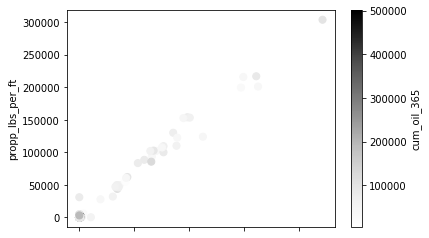

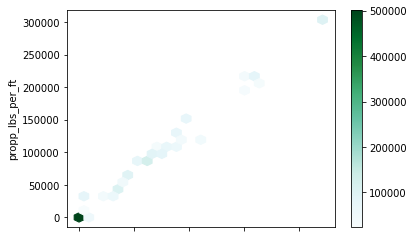

In [27]:
###################################################################################################################
df.plot.scatter(x='fluid_gal_per_ft', y='propp_lbs_per_ft', c='cum_oil_365', s=50);
plt.xlabel('fluid_gal_per_ft')
###################################################################################################################
df.plot.hexbin(x='fluid_gal_per_ft', y='propp_lbs_per_ft', C='cum_oil_365', reduce_C_function=np.max, gridsize=25)
plt.xlabel('fluid_gal_per_ft')
###################################################################################################################

Now let's plot the histogram distibution of cum_oil_365

Text(0.5, 0, 'cum_oil_365')

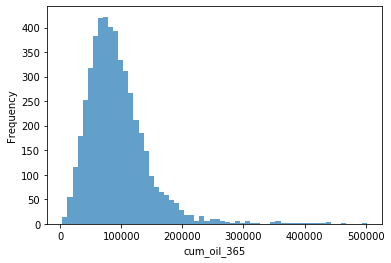

In [28]:
###################################################################################################################
df['cum_oil_365'].plot.hist(alpha=0.7, bins=60)
plt.xlabel('cum_oil_365')
###################################################################################################################

Now let's plot the histogram distribution of all the features within the dataset

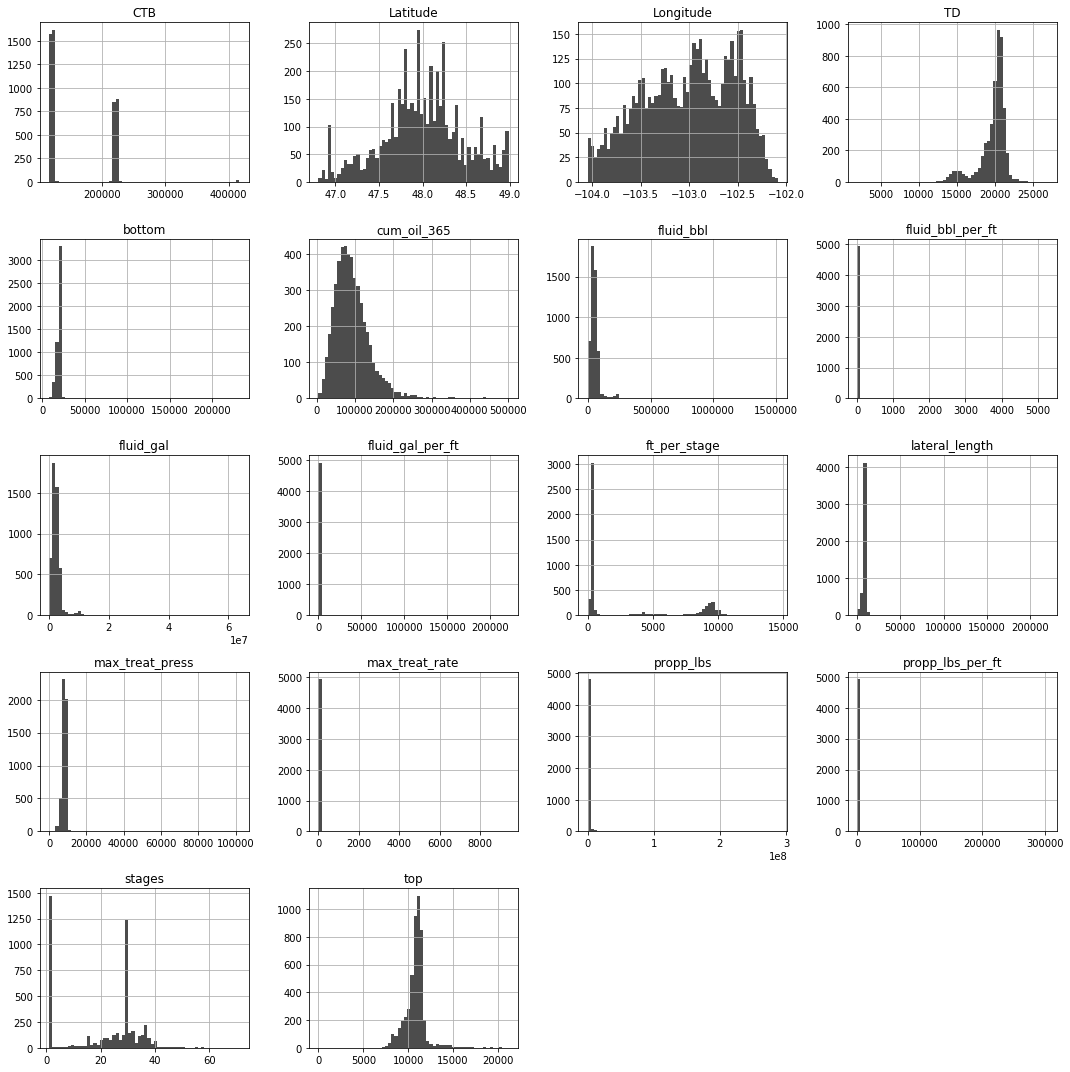

<Figure size 432x288 with 0 Axes>

In [29]:
###################################################################################################################
df.hist(color='k', alpha=0.7, bins=60, figsize=(15, 15))
plt.tight_layout()
plt.show()
plt.clf()
###################################################################################################################

Now let's create a boxplot for a couple features... if vert is set to False, then the boxplot would be horizontal

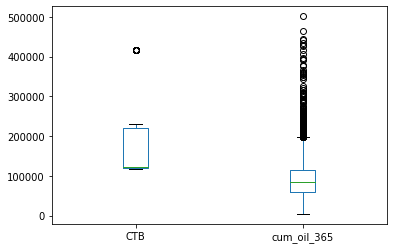

In [30]:
###################################################################################################################
df.iloc[:, [3, -1]].plot.box(vert=True)
###################################################################################################################

Now let's create a matrix scatter plot, with the diagonals representing a density plot of that feature (i.e., what's thr values corresponding distribution/shape?)

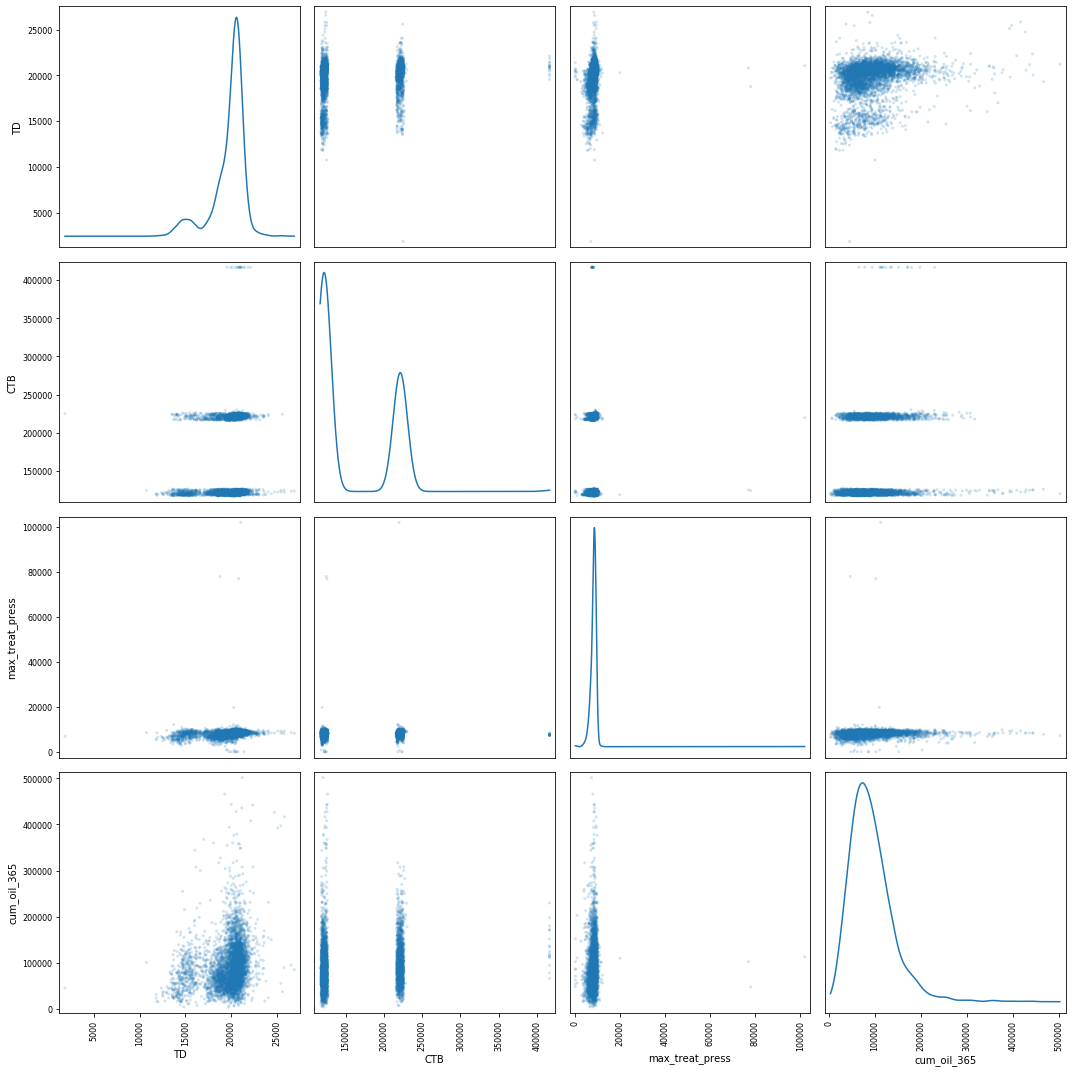

<Figure size 432x288 with 0 Axes>

In [31]:
###################################################################################################################
scatter_matrix(df.iloc[:, [0, 3, 10, -1]], alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.tight_layout()
plt.show()
plt.clf()
###################################################################################################################

#### Summary of Workflow:
* This workflow demonstrated the process of data cleaning and creating a structured dataset to be used later on using Pandas DataFrames. You should have learned how to delete null values, replace 0 with negative values, select a series of data based on a conditional, how to work with dates and times, and how to find particular string and null values and then drop values not corresponding to those. You should have also learned how to create to an Excel file using Pandas DataFrames, and how to read that data back in given a particular Excel spreadsheet. You should have become familiar with the .join and the .conact usage in order to combine different Pandas DataFrames. You should have become familiar with how to access certain features, and several features from a given dataset/DataFrame at a time. You should have also become familiar with how to soft a DataFrame based on a certain feature, and how to reset the index afterwards such that the new value at index 0 corresponds to that index now and not its old index/row location. Lastly, you should have become familiar with how to plot various types of plots using Pandas DataFrame, where if you wanted to learn more about the various ways to plot, please visit https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html